# Projekt koncowy z przedmiotu Programowanie dla analityki danych - Temat 1

W tym projekcie dokonamy predykcji wartości nieruchomości w Bostonie. W tym celu zbudujemy dwa modele, jeden z wykorzystaniem regresji liniowej, natomiast w drugim przypadku posłóżymy się dodatkowo sieciami neuronowymi. Naszym głównym celem jest sprawdzenie który model będzie bardziej precyzyjny i aby to rozstrzygnąć skorzystamy ze wskażnika R2. Dodatkowo przyjrzymy się, które kolumny są ze sobą skorelowane i poszukamy pewnych zależnosći między tymi kolumnami. Naszym zbiorem danych będzie data set `Boston Housing`.

## Wczytanie zbioru danych i wstępna analiza

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

PATH = r'C:\Users\Dominik\Desktop\Studia\Programowanie dla analityki danych\BostonHousing.csv'

df = pd.read_csv(PATH)

In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Nasz data set zawiera 506 wierszy, z czego wszystkie kolumny są typu numerycznego: float i intiger. Dodatkowo nie mamy żadnych pustych wartości, co oznacza, że możemy przejść do standaryzacji naszego zbioru.

## Standaryzacja i przygotowanie zbioru do trenowania modelu

Z racji tego, że będziemy korzystać z modelów regresji, niezbędne jest dokonanie standaryzacji na naszym zbiorze. Zapobiegnie to różnym, nieprzewidzianym zachowaniom podczas trenowania naszych modeli z powodu potencjalnych odstających wartości.

In [4]:
#standardization of df 
df_to_stand = df.iloc[:,:-1].copy()
df_to_stand = (df_to_stand - df_to_stand.min()) / (df_to_stand.max() - df_to_stand.min())
df_to_stand['medv'] = df['medv']

#chnage df name on previous format
df = df_to_stand
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


## Train / test split

Przed zbudowaniem modelu potrzebujemy podzielić nasz data set na zbiór treningowy oraz testowy. Na zbiorze treningowym, tak jak wskazuje nazwa, wytrenujemy nasz model. Gotowy model wykorzystamy do predykcji na zbiorze testowym. Zbiór podzielimy w proporcji 0.75 (treningowy) / 0.25 (testowy)

In [5]:

y = df['medv']
X = df[df.columns.difference(['medv'])]
#drop chas column
X = X.drop(columns='chas', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Korelacja - heatmapa i dataframe

Sprawdzenie korelacji jest zawsze ważnym i niezbędnym elementem podczas analizy danych i budowania modeli uczenia maszynowego. Sprawdzimy teraz które kolumny w naszym zbiorze są ze sobą skorelowane. Aby ułatwić nam analizę korelacji poszczególnych kolumn w naszym zbiorze, stworzymy heatmape. W tym celu skorzystamy z biblioteki matplotlib.

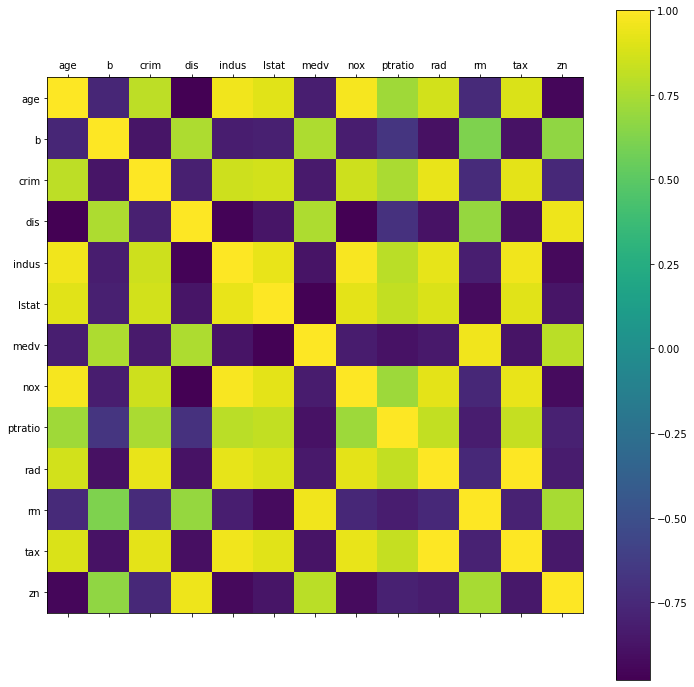

In [6]:
#create df with proper columns to heatmap
df_to_heatmap = df[df.columns.difference(['chas'])]
corrMatrix = df_to_heatmap.corr()

#create heatmap
plt.figure(figsize=(12,12))
plt.matshow(corrMatrix.corr(),fignum=1)
plt.xticks(ticks = list(range(len(df_to_heatmap.columns))),labels = df_to_heatmap.keys())
plt.yticks(ticks = list(range(len(df_to_heatmap.columns))),labels = df_to_heatmap.keys())
plt.colorbar()
plt.show()

In [7]:
corrMatrix

,age,b,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
age,1.000000,-0.273534,0.352734,-0.747881,0.644779,0.602339,-0.376955,0.731470,0.261515,0.456022,-0.240265,0.506456,-0.569537
b,-0.273534,1.000000,-0.385064,0.291512,-0.356977,-0.366087,0.333461,-0.380051,-0.177383,-0.444413,0.128069,-0.441808,0.175520
crim,0.352734,-0.385064,1.000000,-0.379670,0.406583,0.455621,-0.388305,0.420972,0.289946,0.625505,-0.219247,0.582764,-0.200469
dis,-0.747881,0.291512,-0.379670,1.000000,-0.708027,-0.496996,0.249929,-0.769230,-0.232471,-0.494588,0.205246,-0.534432,0.664408
indus,0.644779,-0.356977,0.406583,-0.708027,1.000000,0.603800,-0.483725,0.763651,0.383248,0.595129,-0.391676,0.720760,-0.533828
lstat,0.602339,-0.366087,0.455621,-0.496996,0.603800,1.000000,-0.737663,0.590879,0.374044,0.488676,-0.613808,0.543993,-0.412995
medv,-0.376955,0.333461,-0.388305,0.249929,-0.483725,-0.737663,1.000000,-0.427321,-0.507787,-0.381626,0.695360,-0.468536,0.360445
nox,0.731470,-0.380051,0.420972,-0.769230,0.763651,0.590879,-0.427321,1.000000,0.188933,0.611441,-0.302188,0.668023,-0.516604
ptratio,0.261515,-0.177383,0.289946,-0.232471,0.383248,0.374044,-0.507787,0.188933,1.000000,0.464741,-0.355501,0.460853,-0.391679
rad,0.456022,-0.444413,0.625505,-0.494588,0.595129,0.488676,-0.381626,0.611441,0.464741,1.000000,-0.209847,0.910228,-0.311948


In [8]:
#find the highest corr for each column and print correlated column name
highest_corr = corrMatrix[corrMatrix < 1]
corr_index = highest_corr.idxmax()
corr_index = corr_index.to_frame(name='highest corr column')
corr_index['postive corr'] = highest_corr.max()
corr_index

,highest corr column,postive corr
age,nox,0.731470
b,medv,0.333461
crim,rad,0.625505
dis,zn,0.664408
indus,nox,0.763651
lstat,indus,0.603800
medv,rm,0.695360
nox,indus,0.763651
ptratio,rad,0.464741
rad,tax,0.910228


In [9]:
#find the lowest corr for each column and print correlated column name
highest_corr = corrMatrix[corrMatrix < 1]
corr_index = highest_corr.idxmin()
corr_index = corr_index.to_frame(name='highest corr column')
corr_index['negative corr'] = highest_corr.min()
corr_index

,highest corr column,negative corr
age,dis,-0.747881
b,rad,-0.444413
crim,medv,-0.388305
dis,nox,-0.769230
indus,dis,-0.708027
lstat,medv,-0.737663
medv,lstat,-0.737663
nox,dis,-0.769230
ptratio,medv,-0.507787
rad,dis,-0.494588


Z powyższych danych możemy zaobserwować, że intnieje dość zauważalne zajwisko korelacji wsród naszych kolumn. Jeśli chodzi o korelację pozytywną, wartość w przybilżeniu 0.91 uzyskaliśmy między kolumnami `rad` i `tax`. Kolumna `tax` reprezentuje stawkę podatkową za daną nieruchomość w przeliczeniu na 10,000$, natomiast `rad` oznacza dostępności do infratruktury drogowej - głównie autostrad. Możemy powiedzieć, że im wyższa stawka podatkowa, tym wyższa punktacja w rankingu dostępności do autostrad. 

## Model - regresja liniowa

In [10]:
#building regresion model
reg = LinearRegression()
reg.fit(X_train, y_train)

#print coefficients of each column (a parm in linear function)
coefficients = [round(_,3) for _ in reg.coef_]
named_coef = sorted(list(zip(corrMatrix.keys(),coefficients)), key= lambda x : x[1], reverse=True)
idx = [x[0] for x in named_coef]
vals = [x[1] for x in named_coef]

named_coef = pd.Series(vals, index=idx)
print('Linear function: y=a*x+b\n')

#prediction
pred_linear = reg.predict(X_test)

named_coef

Linear function: y=a*x+b



rad        19.900
ptratio     6.037
tax         4.367
b           3.606
indus       0.284
age        -0.554
rm         -6.526
medv       -7.609
nox        -9.549
crim      -10.995
dis       -15.898
lstat     -18.219
dtype: float64

## Regresja z użyciem sieci neuronowej

Przeprowadzimy teraz regresję liniową, tym razem z wykorzystaniem sieci neuronowych. W naszym przypadku zbudujemy sieć skaładającą się z trzech warstw, w każdej warstwie wykorzystamy trzy neurony.

Z racji, że mam do czynienia z funkcją liniową, dobieramy funkcję aktywacyjną `ReLU` - rectified linear unit. Dodatkowo będziemy monitorować zmienną MeanSquaredError (MSE) w celu przerwania budowania modelu w przypadku gdy wartość ta przestanie znacząco spadać.

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=4),
         ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
         
model = Sequential()
model.add(Dense(3, input_dim=12, activation='relu'))
model.add(Dense(3, activation='relu', input_dim=3))
model.add(Dense(1, activation='linear', input_dim=3))

model.compile(optimizer='Adam', loss=MeanSquaredError(),metrics=['mse'])
model.fit(X_train, y_train, epochs=100, batch_size=16 ,validation_split=0.2, callbacks=callbacks)

#prediction
pred_sequential = model.predict(X_test)

model.summary()



Epoch 1/100
19/19 [==============================] - 2s 52ms/step - loss: 604.9653 - mse: 604.9653 - val_loss: 555.1868 - val_mse: 555.1868
Epoch 2/100
19/19 [==============================] - 0s 25ms/step - loss: 602.0071 - mse: 602.0071 - val_loss: 551.9064 - val_mse: 551.9064
Epoch 3/100
19/19 [==============================] - 1s 29ms/step - loss: 598.0828 - mse: 598.0828 - val_loss: 547.6085 - val_mse: 547.6085
Epoch 4/100
19/19 [==============================] - 1s 34ms/step - loss: 592.9508 - mse: 592.9508 - val_loss: 541.8429 - val_mse: 541.8429
Epoch 5/100
19/19 [==============================] - 0s 18ms/step - loss: 586.2439 - mse: 586.2439 - val_loss: 534.5959 - val_mse: 534.5959
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 578.1926 - mse: 578.1926 - val_loss: 526.3584 - val_mse: 526.3584
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 569.0482 - mse: 569.0482 - val_loss: 516.9935 - val_mse: 516.9935
Epoch 8/100
19/19 [===

In [12]:
r2_linear = r2_score(y_test, pred_linear)
print("R2 score for linear regression is: ", round(r2_linear, 2)) 

r2_sequential= r2_score(y_test, pred_sequential)
print("R2 score for linear regression with using neural networks is: ", round(r2_sequential, 2)) 

R2 score for linear regression is:  0.63
R2 score for linear regression with using neural networks is:  0.11


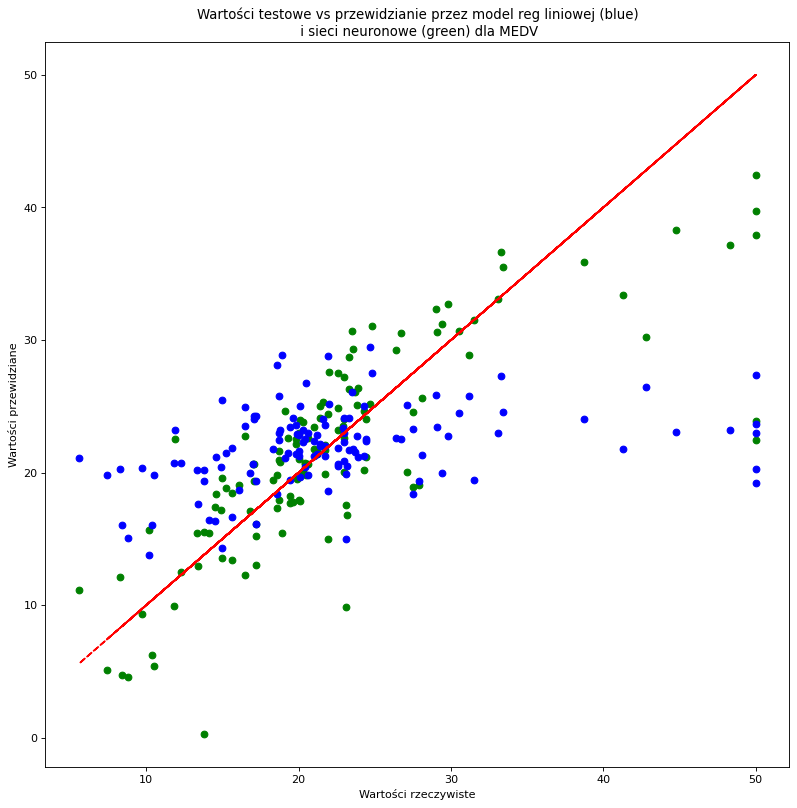

In [13]:
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(y_test, pred_linear, color='green')
plt.scatter(y_test, pred_sequential, color='blue')
plt.plot(y_test, y_test, "r--")
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidziane')
plt.title('Wartości testowe vs przewidzianie przez model reg liniowej (blue)\n i sieci neuronowe (green) dla MEDV')
plt.show()

Wygląda na to, że model z wykorzystaniem sieci neuronowych osiągnał zdecydowanie lepszy R2 score niż model zbudowany z wykorzystaniem zwykłej regresji liniowej, gdyż wartość ta w 1. przypadku jest niemal sześciokrotnie mniejsza niż w drugim, co wysyuwa stwierdzenie, że model oparty na sieciach neurnowych jest bardziej precyzyjny. Potwierdzeniem tego może być wykres powyżej, gdzie dość dobrze widać, że wartości `na zielono` zauważalnie częsciej znajdują się bliżej czerwonej lini. Czerwona linia w tym przypadku odzwierciedla wartości rzeczywiste, pochodzące ze zbioru testowego. 

## Wizualizacje 

W pierwszej kolejności zaprezentujemy wizualizacje rozrzutu relacji pomiędzy kolumnami `medv` i `crim` z naszego zbioru. Dodatkowo na wykres nałożymy linię trendu.

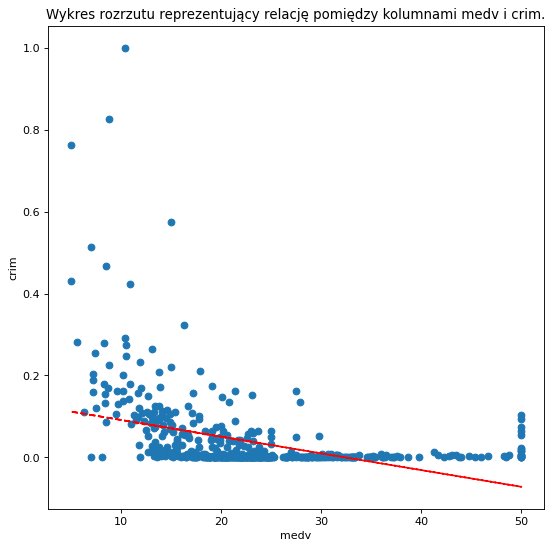

In [14]:
x = df['medv'] 
y = df['crim']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlabel('medv')
plt.ylabel('crim')
plt.title("Wykres rozrzutu reprezentujący relację pomiędzy kolumnami medv i crim.")
plt.show()

Wygląda na to, że występuje pewna zależności między tymi dwoma kolumnami. Spoglądając wyżej na dokładną korelację, wynik ten wyniósł ~ -0.38, co świadczy o dość niskiej korelacji, jednak jest ona negatywna i mimo wszytsko można zauwazyć wpływ jedenj zmiennej na drugą. Możemy wysunąć dość śmaiło wniosek, że im wyższa wartość w kolumnie `medv`, tym mniejsza wartość w kolumnie `crim`, co oznacza, że większa wartość nieruchomości zajmowanych przez właściceli przycznia się do spadku przestępczości.

In [15]:
import plotly.express as px

his = px.histogram(x, labels= {'value' : 'Median value of owner-occupied homes in $1000s.'},
                   title='MEDV HISTOGRAM')
his.update_layout(showlegend=False)
his.show()


In [16]:
mean_medv = df['medv'].mean()
medain_medv = df['medv'].median()

print(f'Average medv is: {round(mean_medv, 2)}')
print(f'Medain for  medv is: {medain_medv}')

Average medv is: 22.53
Medain for  medv is: 21.2


Na stworzonym histogramie kolumny `medv` możemy łatwo podjerzeć wartości które występują najczęściej. Są to warotści od 20 do 25 (w 1000$). Idąc dalej w prawą stronę obserwujemy zauważalny spadek częstotliwości występowań wartości powyżej 25. Więcej z nich znjaduję sie po lewej stornie wykresu, od 5 do 25. Na tej podstawie możemy powiedzieć, że w naszym zbiorze dominowały głównie mniejsze bądż równe średniej wartości domów w Bostonie.

In [17]:
scat = px.scatter(x= df.tax, y=df.rad, labels= {'x' : 'tax', 'y' : 'rad'}, 
                  title='TAX vs RAD SCATTER PLOT')
scat.show()

In [18]:
bar = px.bar(named_coef, labels={'index' : 'column', 'value' : 'coefficient'},
             title='Wartości parametru coefficient dla każdej z kolumn')
bar.update_layout(showlegend=False)
bar.show()


## Podsumowanie

Udało nam się przeprowadzić predykcję wartości nieruchomości (`medv`) za pomocą dwóch modeli. Dodatkowo zauważyliśmy kilka zależności pomiędzy kolumnami w naszym zbiorze. 

### Wnioski:

* model regresji liniowej z wykorzystaniem sieci neuronowych okazał się zdecydowanie bardziej precyzyjny niż model oparty na samej regresji liniowej. R2 score dla 1. wyniósł 0.11 a dla drugiego 0.63.
* udało się zaobserwować kilka mocno skrolowanych kolumn, przykładowo silną korelację pozytwyną zauważono między kolumnami `tax` i `rad`: 0.91, negatywną: -0.76 dla kolumn `dis` i `nox`. 
* więkoszość nieruchomości posiadała wartość która mieściła się w przedziale 5,000 - 25,000 $, zdeycydowanie mniej było droższych nieruchomości.